In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS

Считать данные с помощью pandas

Вывести на экран первые 5 строк

    1.1 Изучите распределение количества памяти (Memory_Amount) с помощью matplotlib
    1.2 Изучите распределение стоимости ноутбуков (Price_euros) с помощью matplotlib
    1.3 Изучите распределение веса ноутбуков (Weight) с помощью matplotlib

    Постройте график
    Назовите график
    Сделайте именование оси x и оси y
    Сделайте выводы


In [5]:
df = pd.read_csv('laptops_10.csv', encoding='cp1251')

Text(0, 0.5, 'Count')

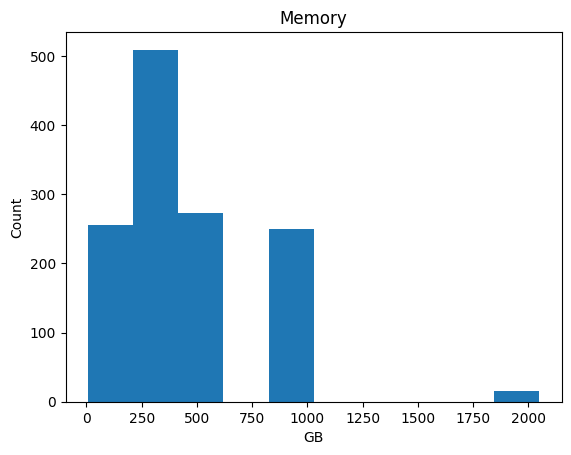

In [6]:
t = plt.hist(df['Memory_Amount'])
plt.title('Memory')
plt.xlabel('GB')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

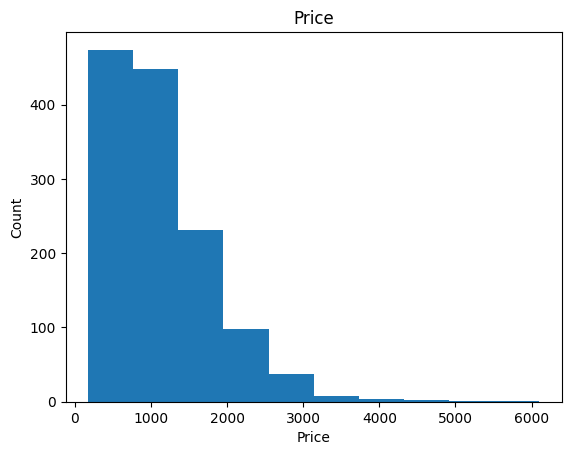

In [7]:
plt.hist(df['Price_euros'])
plt.title('Price')
plt.xlabel('Price')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

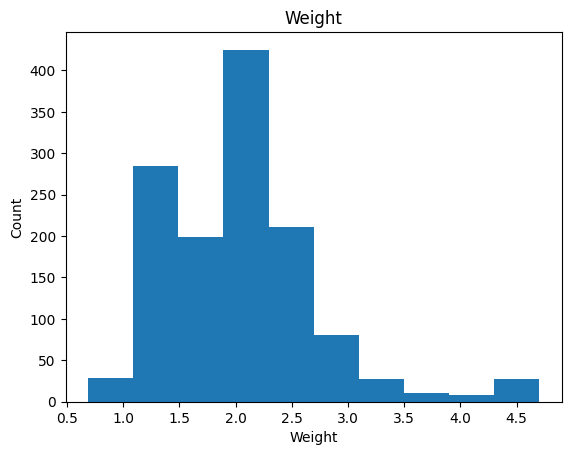

In [8]:
plt.hist(df['Weight'])
plt.title('Weight')
plt.xlabel('Weight')
plt.ylabel('Count')

2.1 Изучите распределение типов носителя (Memory_Type)
2.2 Изучите распределение компаний производителей (Company)
2.3 Изучите распределение операционной системы (OpSys)
2.4 Изучите распределение компаний производителей CPU (Cpu_Company)

Постройте график
Сделайте выводы

In [9]:
date = df['Memory_Type'].value_counts()
date

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

In [10]:
names = date.index
valus = date.values

([<matplotlib.patches.Wedge at 0x1e9a410d930>,
 [Text(0.027844647199021046, 1.099647523355717, 'SSD'),
  Text(-0.2536297077638986, -1.0703606734832887, 'HDD'),
  Text(1.0694364156344285, -0.25749903478457187, 'FlashStorage'),
  Text(1.0995396311060974, -0.031821370603214, 'Hybrid')],
 [Text(0.015187989381284205, 0.5998077400122093, '49.2%'),
  Text(-0.13834347696212648, -0.5838330946272483, '44.2%'),
  Text(0.5833289539824155, -0.14045401897340282, '5.7%'),
  Text(0.5997488896942349, -0.017357111238116726, '0.9%')])

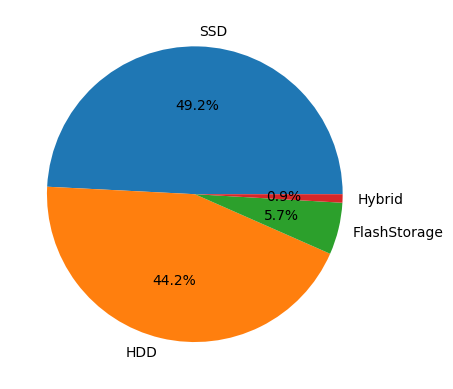

In [11]:
plt.pie(valus, labels=names, autopct='%.1f%%')

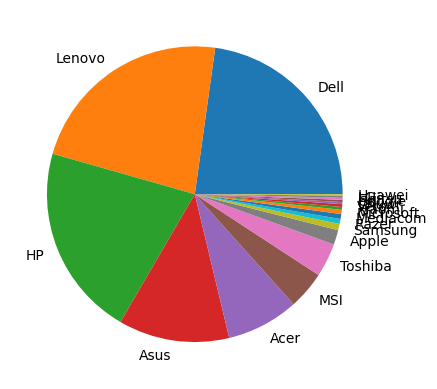

In [12]:
plt.pie(df['Company'].value_counts().values, labels=df['Company'].value_counts().index);

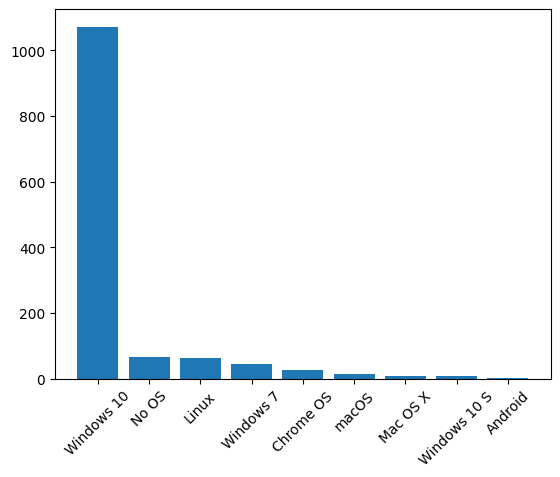

In [13]:
plt.bar(df['OpSys'].value_counts().index, height=df['OpSys'].value_counts().values)
plt.xticks(rotation=45);

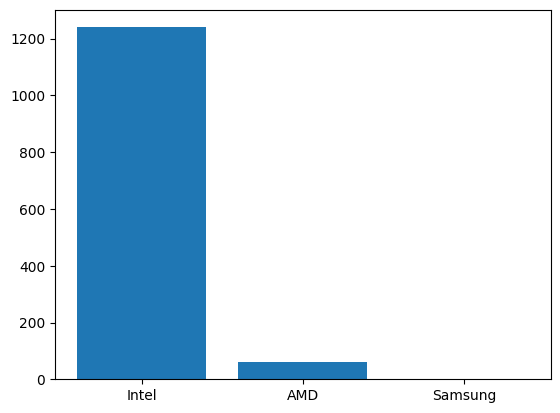

In [14]:
lines = df['Cpu_Company'].value_counts().index
colom = df['Cpu_Company'].value_counts().values
plt.bar(lines, height=colom);

Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах
3.2 Постройте график в относительных величинах

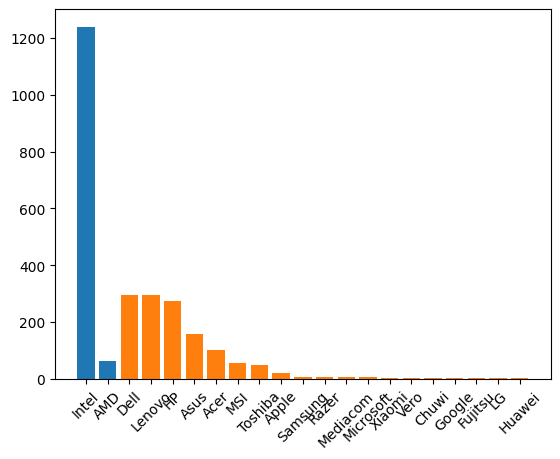

In [15]:
lines_1 = df[df['Cpu_Company'] != 'Samsung']['Cpu_Company'].value_counts().index
colom_1 = df[df['Cpu_Company'] != 'Samsung']['Cpu_Company'].value_counts().values
lines_2 = df[df['Cpu_Company'] != 'Samsung']['Company'].value_counts().index
colom_2 = df[df['Cpu_Company'] != 'Samsung']['Company'].value_counts().values
plt.bar(lines_1, height=colom_1)
plt.bar(lines_2, height=colom_2)
plt.xticks(rotation=45);

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (19,) and arg 1 with shape (2,).

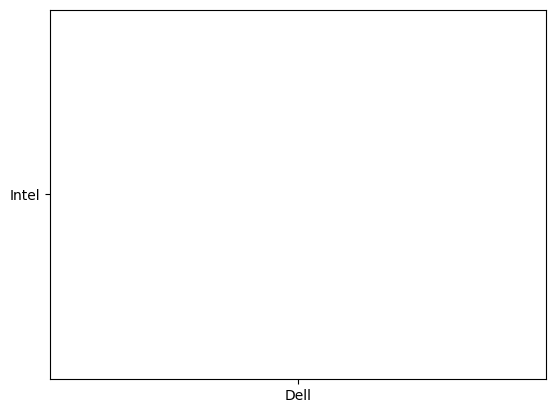

In [16]:
plt.bar(lines_2, height=lines_1)
plt.xticks(rotation=45);

In [ ]:
da = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize='index')
da.reset_index()

Cpu_Company,Company,AMD,Intel,Samsung
0,Acer,0.097087,0.902913,0.000000
1,Apple,0.000000,1.000000,0.000000
2,Asus,0.069620,0.930380,0.000000
3,Chuwi,0.000000,1.000000,0.000000
4,Dell,0.000000,1.000000,0.000000
5,Fujitsu,0.000000,1.000000,0.000000
6,Google,0.000000,1.000000,0.000000
7,HP,0.091241,0.908759,0.000000
8,Huawei,0.000000,1.000000,0.000000
9,LG,0.000000,1.000000,0.000000


In [ ]:
import numpy as np

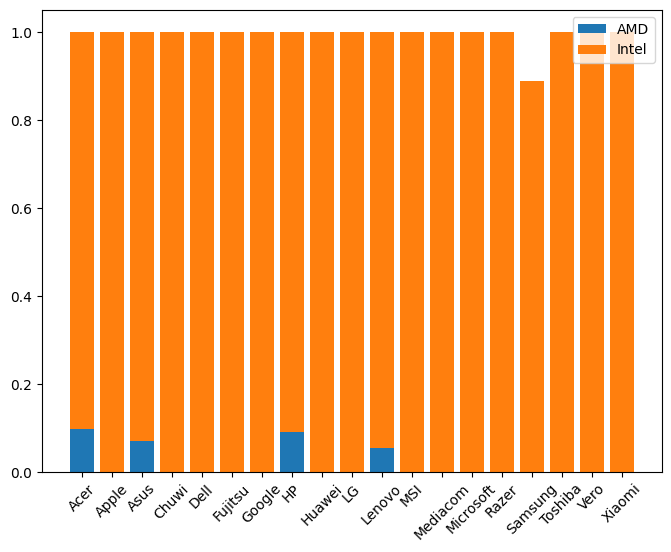

In [ ]:
# plt.figure(figsize=(8, 6))
# ticks = np.arange(len(da['AMD']))
# x = 0.2
# y = 0.4
# plt.bar(da['Company'], da['AMD'])
# plt.bar(da['Company'], da['Intel'], bottom=da['AMD'])

da = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize='index').reset_index()
plt.figure(figsize=(8, 6))
ticks = np.arange(len(da['AMD']))
x = 0.2
y = 0.4
plt.bar(da['Company'], da['AMD'])
plt.bar(da['Company'], da['Intel'], bottom=da['AMD'])
plt.xticks(rotation=45);
plt.legend(['AMD', 'Intel'])

In [2]:
def F(S, t, m):
    for i in range(m):
        S = S*(1.025**20) - t
    return S

print(F(500_000, 100, 20))

9735990370.367483
